![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head(50)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

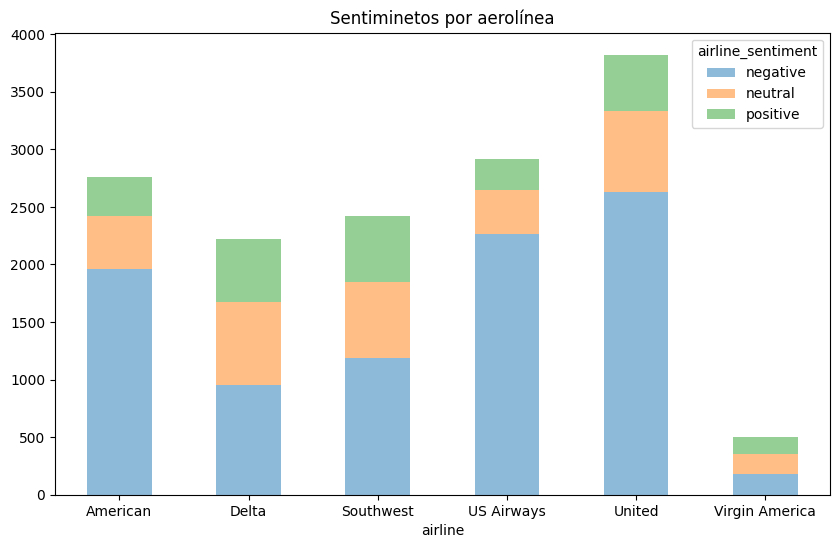

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
def vectorizador(vectorizer,X_train,X_test):
    np.random.seed(1)
    # Vectorización de los datos
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    return X_train_vec, X_test_vec

# Definir una función para tokenizar y lematizar el texto con verbos
def lemanizador(text):
    lemmatizer = WordNetLemmatizer()
    text = text.lower()
    words = text.split()
    return [lemmatizer.lemmatize(word, pos='v') for word in words]

def prediccion(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    # Predicción
    y_pred = model.predict(X_test)
    #Accuracy_score
    return accuracy_score(y_test, y_pred)

In [12]:
# Celda 1

vectorizer=CountVectorizer()
modelo=RandomForestClassifier(random_state=42)
X_trainVect,X_testVect =vectorizador(vectorizer,X_train,X_test)
prediccion_CV=prediccion(modelo,X_trainVect,y_train,X_testVect,y_test)

In [13]:
print(f'Accuracy utilizando solo CountVectorizer: {prediccion_CV}')

Accuracy utilizando solo CountVectorizer: 0.7711092715231788


**Conclusiones:**
- Con un valor de accuracy de 0.7711 utilizando solo CountVectorizer, podemos concluir que el modelo de Random Forest logra predecir correctamente el sentimiento sobre distintas aerolíneas de EE.UU. en el 77.11% de los tweets en el conjunto X_testVect. Este resultado indica un rendimiento moderadamente bueno, sin embargo a continuación se añadiran métodos para evaluar si mejora o no la predicción.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 2
vectorizer_no_stopw=CountVectorizer(stop_words='english')
modelo=RandomForestClassifier(random_state=42)
X_trainVect_SW,X_testnVect_SW =vectorizador(vectorizer_no_stopw,X_train,X_test)
prediccion_SW=prediccion(modelo,X_trainVect_SW,y_train,X_testnVect_SW,y_test)

In [15]:
print(vectorizer_no_stopw.get_stop_words())

frozenset({'which', 'towards', 'six', 'may', 'among', 'twenty', 'during', 'once', 'all', 'con', 'from', 'move', 'either', 'the', 'eg', 'here', 'such', 'therein', 'whereafter', 'find', 'together', 'third', 'cannot', 'was', 'onto', 'mill', 'beyond', 'in', 'former', 'under', 'around', 'nor', 'hers', 'latterly', 'amongst', 'our', 'yet', 'few', 'than', 'hereupon', 'name', 'when', 'ten', 'will', 'hereby', 'seems', 'detail', 'full', 'something', 'own', 'everywhere', 'while', 'through', 'whereby', 'amount', 'both', 'indeed', 'though', 'least', 'anywhere', 'nobody', 'no', 'there', 'becoming', 'yours', 'de', 'hasnt', 'part', 'into', 'else', 'call', 'other', 'front', 'upon', 'mostly', 'mine', 'not', 'system', 'already', 'very', 'being', 'nine', 'twelve', 'ie', 'also', 'sincere', 'always', 'fifteen', 'un', 'each', 'they', 'somehow', 'itself', 'whole', 'so', 'this', 'namely', 'after', 'forty', 'formerly', 'what', 'am', 'afterwards', 'off', 'everyone', 'should', 'even', 'of', 'do', 'keep', 'an', 'ar

In [16]:
print(f'Accuracy utilizando CountVectorizer con eliminación de stopwords: {prediccion_SW}')

Accuracy utilizando CountVectorizer con eliminación de stopwords: 0.761796357615894


- A pesar de que usualmente se espera un mejor rendimiento, utilizando CountVectorizer con eliminación de stopwords se obtuvo un accuracy de 0.7618 (76.18 %) , lo que significa una ligera disminución en el rendimiento del modelo en comparación con el uso de CountVectorizer solo. Esto indica que la eliminación de stopwords no es beneficiosa para este conjunto de datos o que la lista de stopwords utilizada puede no ser la más adecuada

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
# Celda 3
import nltk
nltk.download('wordnet')

vectorizer = CountVectorizer(analyzer=lemanizador)
modelo=RandomForestClassifier(random_state=1)
X_train_dtm, X_test_dtm = vectorizador(vectorizer,X_train, X_test)
prediccion_Leman=prediccion(modelo,X_train_dtm, y_train, X_test_dtm, y_test)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
print(f'Accuracy utilizando CountVectorizer y lematización del texto con verbos: {prediccion_Leman}')

Accuracy utilizando CountVectorizer y lematización del texto con verbos: 0.7593129139072847


**Conclusiones**
- Con un valor de accuracy de 0.7593 utilizando CountVectorizer y lematización del texto con verbos, observamos nuevamente una disminución en el rendimiento del modelo en comparación con el uso de CountVectorizer solo. En este caso, pueda que se pierdan matices o detalles importantes presentes en las otras formas de las palabras, lo que conduce a predicciones menos precisas.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [19]:
# Celda 4
vectorizer = CountVectorizer(analyzer=lemanizador,stop_words='english')
modelo=RandomForestClassifier(random_state=1)
X_train_dtm, X_test_dtm = vectorizador(vectorizer,X_train, X_test)
prediccion_mixto=prediccion(modelo,X_train_dtm, y_train, X_test_dtm, y_test)

In [20]:
print(f'Accuracy utilizando CountVectorizer con eliminación de stopwords y lematización del texto con verbos: {prediccion_mixto}')

Accuracy utilizando CountVectorizer con eliminación de stopwords y lematización del texto con verbos: 0.7593129139072847


**Conclusiones**

- Con un valor de accuracy de 0.7593, al igual que en el punto 3, se obtiene un peor rendimiento utilizando múltiples técnicas en comparación con el uso de CountVectorizer solo.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

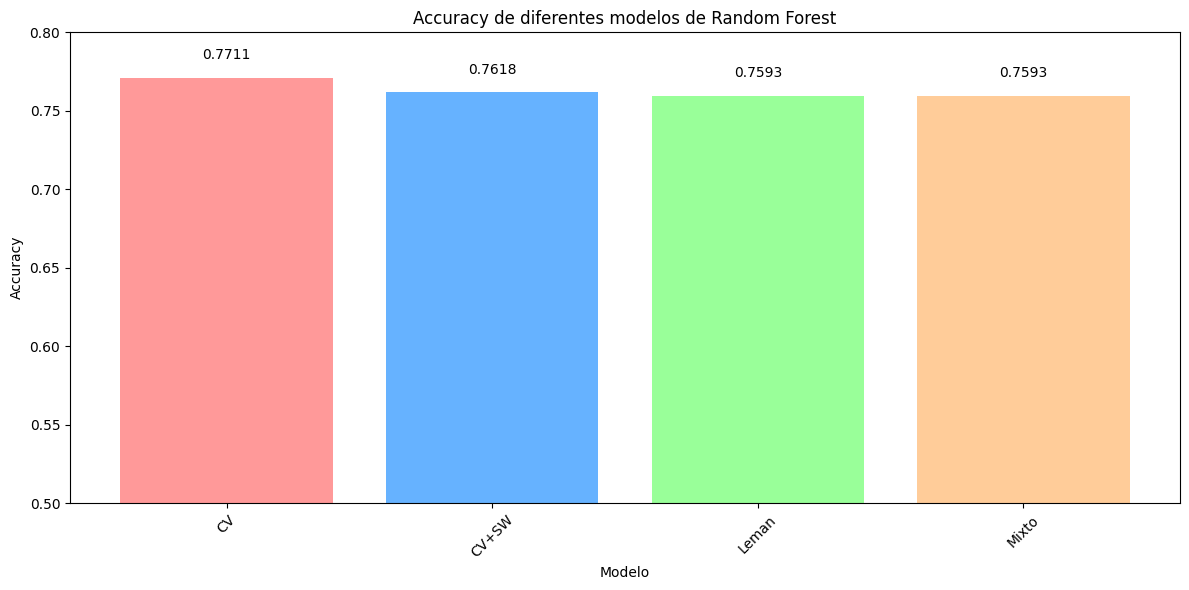

In [21]:
# Celda 5
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

accuracies = [prediccion_CV, prediccion_SW, prediccion_Leman, prediccion_mixto]
models = ['CV', 'CV+SW', 'Leman', 'Mixto']

plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color=colors)

plt.title('Accuracy de diferentes modelos de Random Forest')
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.ylim(0.5, 0.8)
plt.xticks(rotation=45)

# Agrega los valores de accuracy encima de cada barra
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(accuracy, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Conclusiones**

El mejor rendimiento fue obtenido utilizando CountVectorizer solo, puesto que logra predecir correctamente el sentimiento sobre distintas aerolíneas de EE.UU. en el 77.11% de los tweets en el conjunto de prueba.

A pesar de que se esperaba mejorias en el rendimiento utilizando la eliminación de stopword o lematización, se evidenció que el acurracy empeora levemente con la empleación de estas técnicas ya sea por separado o en conjunto. En el caso de eliminación de stopwords en el que se obtuvo un accuracy de 76.18%, algunas palabras como 'not', 'without',las cuales fueron eliminadas, podrían ser críticas para determinar el sentimiento negativo, por lo que al no eliminarlas se podria captar mejor el contexto y por ende, obtener predicciones más acertadas.

Para el tercer y cuarto punto en el que se utilizó lematización y múltiples técnicas (lematización + eliminación de stopwords), se obtuvo igual accuracy (75,93%) lo que podria significar que el modelo ya está capturando "eficientemente" el significado semántico de las palabras sin necesidad de lematizarlas.

Por lo anterior, se recomienda revisar la lista de stopwords y no utilizar aquellas que puedan afectar la captación de información relevante para este caso.
